In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pickle as pk

import mcm_rb_circuits_for_simulation as mcmrb_sims

import qiskit.providers.aer.noise as noise
import qiskit.quantum_info as qi

In [4]:
def load_object(filename):
    try:
        with open(filename, "rb") as f:
            return pk.load(f)
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

In [5]:
# Error models

def U_stark(phi):
    return sp.linalg.expm(-1j*phi*np.array([[1,0],[0,-1]]))

def cm_K(cm_prob):
    return [np.sqrt(1-cm_prob)*np.array([[1.0,0.0],[0.0,1.0]]),np.sqrt(cm_prob)*np.array([[1.0,0.0],[0.0,0.0]]),np.sqrt(cm_prob)*np.array([[0.0,0.0],[0.0,1.0]])]

Imat = np.array([[1.,0.],[0.,1.]])
Zmat = np.array([[1.,0.],[0.,-1.]])

def U_col(delta,J):
    Ham = J*np.array([[0,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,0]]) + (delta)*np.kron(Imat,Zmat)/2
    return sp.linalg.expm(-1j*Ham*meas_time)


In [6]:
qnd_fdata = load_object("qnd_sims1.pickle")
st_fdata = load_object("st_sims1.pickle")
cm_fdata = load_object("cm_sims1.pickle")
col_fdata = load_object("col_sims1.pickle")
ZZ_fdata = load_object("ZZ_sims1.pickle")

In [7]:
dep_probs = np.arange(0.02,0.21,0.02)
phis = 2*np.pi*20/1000*0.71*np.arange(0.05,1.05,0.05)
cm_probs = np.arange(0.01,0.21,0.01)
deltas = 2*np.pi*np.array([0.0,1.0,2.0,5.0,10.0,20.0,50.0,100.0,200.0,500.0])

seeds = 60

xvals_qnd = qnd_fdata[0]
rb_res_qnd = qnd_fdata[1]
fits_qnd = qnd_fdata[2]
lfits_qnd = qnd_fdata[3]

xvals_st = st_fdata[0]
rb_res_st = st_fdata[1]
fits_st = st_fdata[2]
lfits_st = st_fdata[3]

xvals_cm = cm_fdata[0]
rb_res_cm = cm_fdata[1]
fits_cm = cm_fdata[2]
lfits_cm = cm_fdata[3]

xvals_col = col_fdata[0]
rb_res_col = col_fdata[1]
fits_col = col_fdata[2]
lfits_col = col_fdata[3]

xvals_ZZ = ZZ_fdata[0]
rb_res_ZZ = ZZ_fdata[1]
fits_ZZ = ZZ_fdata[2]
lfits_ZZ = ZZ_fdata[3]

In [8]:
xval = xvals_qnd[0]

In [9]:
qnd_data = np.zeros([len(xvals_qnd),3,2,seeds,len(xval)])
for mm in range(len(xvals_qnd)):
    for exp_ind in range(0,3):
        for i in range(seeds):
            for qn in range(0,2):
                qnd_data[mm,exp_ind,qn,i,:] = rb_res_qnd[mm]['rb_res_%d_%d'%(exp_ind,qn)][i*len(xval):(i+1)*len(xval)]

st_data = np.zeros([len(xvals_st),3,2,seeds,len(xval)])
for mm in range(len(xvals_st)):
    for exp_ind in range(0,3):
        for i in range(seeds):
            for qn in range(0,2):
                st_data[mm,exp_ind,qn,i,:] = rb_res_st[mm]['rb_res_%d_%d'%(exp_ind,qn)][i*len(xval):(i+1)*len(xval)]

cm_data = np.zeros([len(xvals_cm),3,2,seeds,len(xval)])
for mm in range(len(xvals_cm)):
    for exp_ind in range(0,3):
        for i in range(seeds):
            for qn in range(0,2):
                cm_data[mm,exp_ind,qn,i,:] = rb_res_cm[mm]['rb_res_%d_%d'%(exp_ind,qn)][i*len(xval):(i+1)*len(xval)]

col_data = np.zeros([len(xvals_col),3,2,seeds,len(xval)])
for mm in range(len(xvals_col)):
    for exp_ind in range(0,3):
        for i in range(seeds):
            for qn in range(0,2):
                col_data[mm,exp_ind,qn,i,:] = rb_res_col[mm]['rb_res_%d_%d'%(exp_ind,qn)][i*len(xval):(i+1)*len(xval)]

ZZ_data = np.zeros([len(xvals_ZZ),3,2,seeds,len(xval)])
for mm in range(len(xvals_ZZ)):
    for exp_ind in range(0,3):
        for i in range(seeds):
            for qn in range(0,2):
                ZZ_data[mm,exp_ind,qn,i,:] = rb_res_ZZ[mm]['rb_res_%d_%d'%(exp_ind,qn)][i*len(xval):(i+1)*len(xval)]

## Figure 3

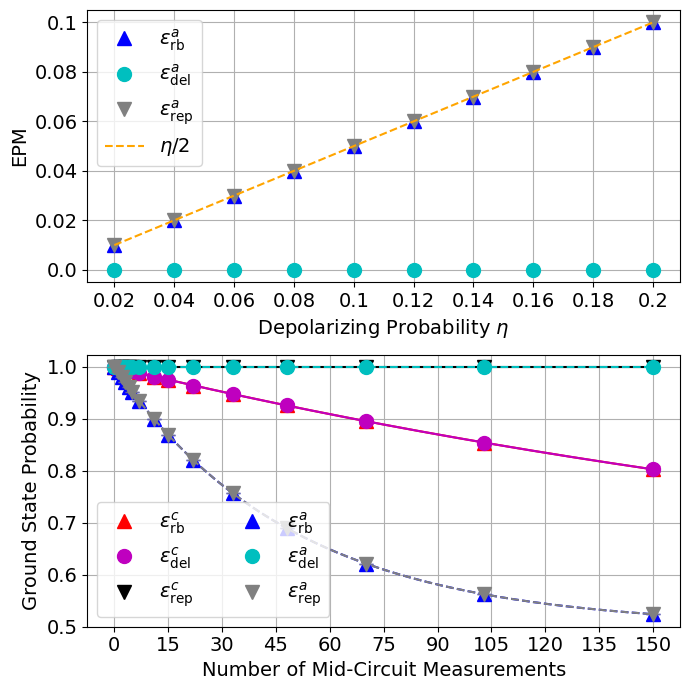

In [10]:
fig, ax = plt.subplots(2,1,figsize=(7,7))

fsize = 14
msize2 = 10

q_list = [0,1]
markers = ["^","o","v"]
colours = ['b','c','grey']
labels = [r'$\epsilon^{a}_{\rm rb}$',r'$\epsilon^{a}_{\rm del}$',r'$\epsilon^{a}_{\rm rep}$']

epcs = np.zeros([3,2,len(dep_probs)])
epc_errs = np.zeros([3,2,len(dep_probs)])
for (ind, err) in enumerate(dep_probs):
    for j in range(3):
        for (k,q) in enumerate(q_list):
            fits = fits_qnd[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,k)][1]))
            alpha = fits['fit_%d_%d'%(j,k)][0][1]
            alpha_err = std_errs[1]
            epcs[j,k,ind]=(1-alpha)/2
            epc_errs[j,k,ind]=1/2*alpha_err

for j in range(3):
    ax[0].plot(dep_probs,epcs[j,1,:],linestyle='',markersize=msize2, marker=markers[j],color=colours[j],label=labels[j])
    
ax[0].plot(dep_probs,dep_probs/2,linestyle='--', marker='',color='orange',label=r'$\eta/2$')
     
ax[0].legend(loc=0,fontsize=fsize)   
ax[0].set_xlabel(r'Depolarizing Probability $\eta$',fontsize=fsize)
ax[0].set_ylabel('EPM',fontsize=fsize)
ax[0].set_xticks(dep_probs)
ax[0].set_xticklabels(np.round(dep_probs,decimals=3),fontsize=fsize)
ax[0].set_yticks(np.arange(0,0.11,0.02))
ax[0].set_yticklabels(np.arange(0,0.11,0.02),fontsize=fsize)
# ax.set_title('a) Non-QND Measurement Error',fontsize=fsize,fontweight="bold")
ax[0].grid('minor')


ind = 0
msize = 10

xval = xvals_qnd[ind]
data = qnd_data[ind]
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = [0,1]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, True, True, True, True]
epc_limit = 1e-5

for (k, q) in enumerate(q_list):
    temp_ind = k#np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        if expfit[3*k+j]:
            # exponential
            fits = fits_qnd[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
            alpha_err = std_errs[1]
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err

            if epc < epc_limit:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1].plot(fxval, mcmrb_sims.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            fits = lfits_qnd[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = np.exp(-fits['fit_%d_%d'%(j,temp_ind)][0][0])
            alpha_err = std_errs[0]*alpha
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err


            if epc < epc_limit:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1].plot(fxval, mcmrb_sims.linearfunction(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])

fsize2 = fsize
ax[1].legend(ncol = 2,fontsize=fsize2)
ax[1].set_ylabel('Ground State Probability',fontsize=fsize2)
ax[1].set_xlabel('Number of Mid-Circuit Measurements',fontsize=fsize2)
ax[1].set_xticks(range(0,160,15))
ax[1].set_xticklabels(range(0,160,15),fontsize=fsize2)
ax[1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize2)
# # plt.title('Collision')
ax[1].grid('minor')


plt.tight_layout();

# plt.savefig('Plots/Sims_non-QND_v2.pdf',facecolor=(1, 1, 1),bbox_inches='tight')

## Figure 4

In [11]:
st_errs = np.zeros(len(phis))
for i, x in enumerate(phis):
    st_errs[i] = 1 - (np.abs(np.trace(U_stark(x)))**2 + 2)/(2**2+2)

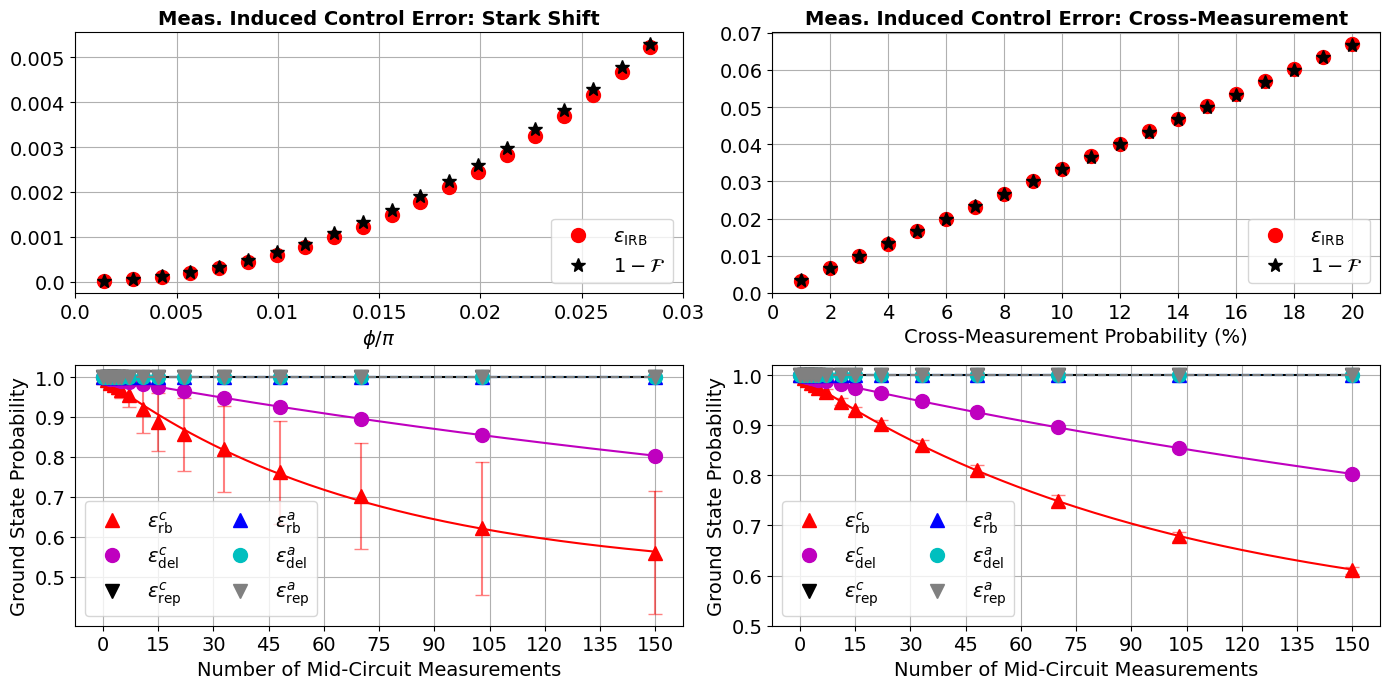

In [12]:
fig, ax = plt.subplots(2,2,figsize=(14,7))

# Stark shift

q_list = [0,1]
markers = ["^","o","v"]
colours = ['r','b','k']
labels = [r'$\epsilon^{c}_{\rm rb}$',r'$\epsilon^{c}_{\rm del}$',r'$\epsilon^{c}_{\rm rep}$']

fsize = 14
msize2 = 10

epcs = np.zeros([2,len(phis)])
epc_errs = np.zeros([2,len(phis)])
for (ind, err) in enumerate(phis):
    for (k,q) in enumerate(q_list):
        fits = fits_st[ind]
        std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(1,k)][1]))
        alphaI = fits['fit_%d_%d'%(0,k)][0][1]
        alpha0 = fits['fit_%d_%d'%(1,k)][0][1]
        alpha = alphaI/alpha0
        alpha_err = std_errs[1]
        epcs[k,ind]=(1-alpha)/2
        epc_errs[k,ind]=1/2*alpha_err


ax[0,0].plot(phis/np.pi,epcs[0,:],linestyle='',markersize=msize2, marker='o',color='r',label=r'$\epsilon_{\rm IRB}$')

ax[0,0].plot(phis/np.pi,st_errs,linestyle='',markersize=msize2, marker='*',color='k',label=r'$1 - \mathcal{F}$')

ax[0,0].legend(loc=4,fontsize=fsize)   
ax[0,0].set_xlabel(r'$\phi/\pi$',fontsize=fsize)
# ax[0,0].set_ylabel('Measurement Induced Error',fontsize=fsize)
ax[0,0].set_xticks(np.arange(0.0,0.034,0.005))
ax[0,0].set_xticklabels(np.round(np.arange(0.0,0.034,0.005),decimals=3),fontsize=fsize)
ax[0,0].set_yticks(np.arange(0.,0.006,0.001))
ax[0,0].set_yticklabels(np.arange(0.,0.006,0.001),fontsize=fsize)
ax[0,0].set_title('Meas. Induced Control Error: Stark Shift',fontsize=fsize,fontweight="bold")
ax[0,0].grid('minor')

ind = -1
msize = 10

xval = xvals_st[ind]
data = st_data[ind]
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = [0,1]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, True, True, True, True]
epc_limit = 1e-5

for (k, q) in enumerate(q_list):
    temp_ind = k#np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        if expfit[3*k+j]:
            # exponential
            fits = fits_st[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
            alpha_err = std_errs[1]
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err

            if epc < epc_limit:
                ax[1,0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,0].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1,0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,0].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1,0].plot(fxval, mcmrb_sims.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            fits = lfits_st[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = np.exp(-fits['fit_%d_%d'%(j,temp_ind)][0][0])
            alpha_err = std_errs[0]*alpha
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err


            if epc < epc_limit:
                ax[1,0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,0].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1,0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,0].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1,0].plot(fxval, mcmrb_sims.linearfunction(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])

fsize2 = fsize
ax[1,0].legend(loc=0,ncol = 2,fontsize=fsize2)
ax[1,0].set_ylabel('Ground State Probability',fontsize=fsize2)
ax[1,0].set_xlabel('Number of Mid-Circuit Measurements',fontsize=fsize2)
ax[1,0].set_xticks(range(0,160,15))
ax[1,0].set_xticklabels(range(0,160,15),fontsize=fsize2)
ax[1,0].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[1,0].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize2)
ax[1,0].grid('minor')

# Cross-measurement

q_list = [0,1]
markers = ["^","o","v"]
colours = ['r','b','k']
labels = [r'$\epsilon^{c}_{\rm rb}$',r'$\epsilon^{c}_{\rm del}$',r'$\epsilon^{c}_{\rm rep}$']

epcs = np.zeros([2,len(phis)])
epc_errs = np.zeros([2,len(phis)])
for (ind, err) in enumerate(phis):
    for (k,q) in enumerate(q_list):
        fits = fits_cm[ind]
        std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(1,k)][1]))
        alphaI = fits['fit_%d_%d'%(0,k)][0][1]
        alpha0 = fits['fit_%d_%d'%(1,k)][0][1]
        alpha = alphaI/alpha0
        alpha_err = std_errs[1]
        epcs[k,ind]=(1-alpha)/2
        epc_errs[k,ind]=1/2*alpha_err


ax[0,1].plot(cm_probs*100,epcs[0,:],linestyle='',markersize=msize2, marker='o',color='r',label=r'$\epsilon_{\rm IRB}$')

ax[0,1].plot(cm_probs*100,cm_probs/3,linestyle='',markersize=msize2, marker='*',color='k',label=r'$1 - \mathcal{F}$')

ax[0,1].legend(loc=4,fontsize=fsize)   
ax[0,1].set_xlabel('Cross-Measurement Probability (%)',fontsize=fsize)
# ax[0,0].set_ylabel('Measurement Induced Error',fontsize=fsize)
ax[0,1].set_xticks(range(0,21,2))
ax[0,1].set_xticklabels(range(0,21,2),fontsize=fsize)
ax[0,1].set_yticks(np.arange(0.,0.07,0.01))
ax[0,1].set_yticklabels(np.arange(0.,0.07,0.01),fontsize=fsize)
ax[0,1].set_title('Meas. Induced Control Error: Cross-Measurement',fontsize=fsize,fontweight="bold")
ax[0,1].grid('minor')

ind = 0
msize = 10

xval = xvals_cm[ind]
data = cm_data[ind]
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = [0,1]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, True, True, True, True]
epc_limit = 1e-5

for (k, q) in enumerate(q_list):
    temp_ind = k#np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        if expfit[3*k+j]:
            # exponential
            fits = fits_cm[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
            alpha_err = std_errs[1]
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err

            if epc < epc_limit:
                ax[1,1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1,1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1,1].plot(fxval, mcmrb_sims.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            fits = lfits_cm[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = np.exp(-fits['fit_%d_%d'%(j,temp_ind)][0][0])
            alpha_err = std_errs[0]*alpha
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err


            if epc < epc_limit:
                ax[1,1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1,1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1,1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1,1].plot(fxval, mcmrb_sims.linearfunction(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])

fsize2 = fsize
ax[1,1].legend(loc=0,ncol = 2,fontsize=fsize2)
ax[1,1].set_ylabel('Ground State Probability',fontsize=fsize2)
ax[1,1].set_xlabel('Number of Mid-Circuit Measurements',fontsize=fsize2)
ax[1,1].set_xticks(range(0,160,15))
ax[1,1].set_xticklabels(range(0,160,15),fontsize=fsize2)
ax[1,1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[1,1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize2)
ax[1,1].grid('minor')


plt.tight_layout();

# plt.savefig('Plots/Sims_control_error.pdf',facecolor=(1, 1, 1),bbox_inches='tight')

## Figure 5

In [13]:
meas_time = 0.71

col_errs = np.zeros(len(deltas))
col_errs2 = np.zeros(len(deltas))
for i, x in enumerate(deltas):
    col_errs[i] = 1 - (np.abs(np.trace(U_col(x,2*np.pi)))**2 + 4)/(4**2+4)
    
    error_col= noise.coherent_unitary_error(U_col(x,2*np.pi))
    Choi_col = qi.Choi(error_col.to_instruction())/4
    Choi_control = qi.Choi(qi.partial_trace(Choi_col.data,[0,2]).data*2)
    Ecol_control = qi.SuperOp(Choi_control.to_instruction())
    
    col_errs2[i] = 1 - (np.abs(np.trace(Ecol_control.data)) + 2)/(2**2+2)

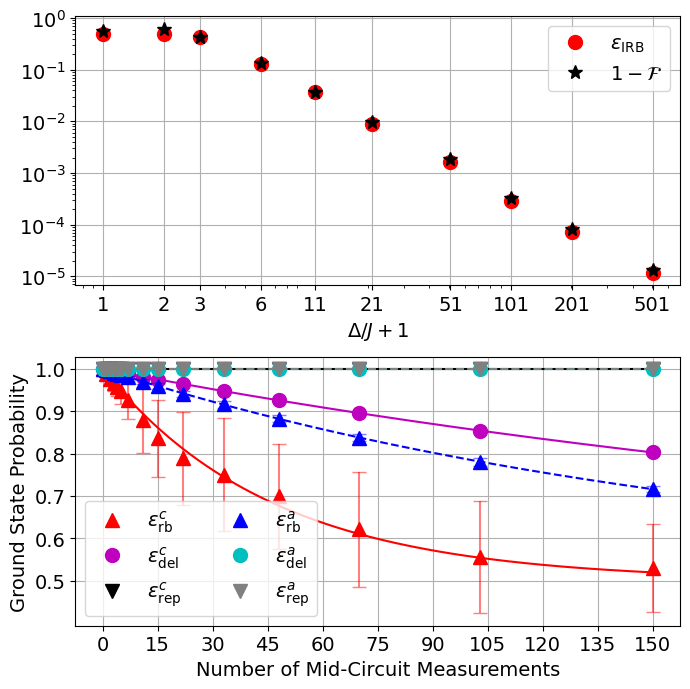

In [14]:
fig, ax = plt.subplots(2,1,figsize=(7,7))

q_list = [0,1]
markers = ["^","o","v"]
colours = ['r','b','k']
labels = [r'$\epsilon^{c}_{\rm rb}$',r'$\epsilon^{c}_{\rm del}$',r'$\epsilon^{c}_{\rm rep}$']

fsize = 14
msize2 = 10

epcs = np.zeros([2,len(deltas)])
epc_errs = np.zeros([2,len(deltas)])
for (ind, err) in enumerate(deltas):
    for (k,q) in enumerate(q_list):
        fits = fits_col[ind]
        std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(1,k)][1]))
        alphaI = fits['fit_%d_%d'%(0,k)][0][1]
        alpha0 = fits['fit_%d_%d'%(1,k)][0][1]
        alpha = alphaI/alpha0
        alpha_err = std_errs[1]
        epcs[k,ind]=(1-alpha)/2
        epc_errs[k,ind]=1/2*alpha_err


ax[0].loglog(deltas/2/np.pi+1,epcs[0,:],linestyle='',markersize=msize2, marker='o',color='r',label=r'$\epsilon_{\rm IRB}$')
    
ax[0].loglog(deltas/2/np.pi+1,col_errs2,linestyle='',markersize=msize2, marker='*',color='k',label=r'$1 - \mathcal{F}$')

ax[0].legend(fontsize=fsize)   
ax[0].set_xlabel(r'$\Delta/J + 1$',fontsize=fsize)
ax[0].set_xticks([  1,   2,   3,   6,  11,  21,  51, 101, 201, 501])
ax[0].set_xticklabels([  1,   2,   3,   6,  11,  21,  51, 101, 201, 501],fontsize=fsize)
ax[0].set_yticks(np.logspace(-5,0,6))
ax[0].set_yticklabels([r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'],fontsize=fsize)
ax[0].grid('minor')

ind = 5
msize = 10

xval = xvals_col[ind]
data = col_data[ind]
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = [0,1]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, True, True, True, True]
epc_limit = 1e-5

for (k, q) in enumerate(q_list):
    temp_ind = k#np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        if expfit[3*k+j]:
            # exponential
            fits = fits_col[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
            alpha_err = std_errs[1]
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err

            if epc < epc_limit:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1].plot(fxval, mcmrb_sims.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            fits = lfits_col[ind]
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = np.exp(-fits['fit_%d_%d'%(j,temp_ind)][0][0])
            alpha_err = std_errs[0]*alpha
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err


            if epc < epc_limit:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))
            else:
                ax[1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0),yerr=np.std(data[j,temp_ind,:,:],0),alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[1].plot(xval, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s}$'%(labels[k],exps[j]))

            ax[1].plot(fxval, mcmrb_sims.linearfunction(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])

fsize2 = fsize
ax[1].legend(loc=0,ncol = 2,fontsize=fsize2)
ax[1].set_ylabel('Ground State Probability',fontsize=fsize2)
ax[1].set_xlabel('Number of Mid-Circuit Measurements',fontsize=fsize2)
ax[1].set_xticks(range(0,160,15))
ax[1].set_xticklabels(range(0,160,15),fontsize=fsize2)
ax[1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize2)
ax[1].grid('minor')

plt.tight_layout();

# plt.savefig('Plots/Sims_collision.pdf',facecolor=(1, 1, 1),bbox_inches='tight')

## Figure 6

In [15]:
T1s = [100.0,10.0,1.0,0.1,0.01]

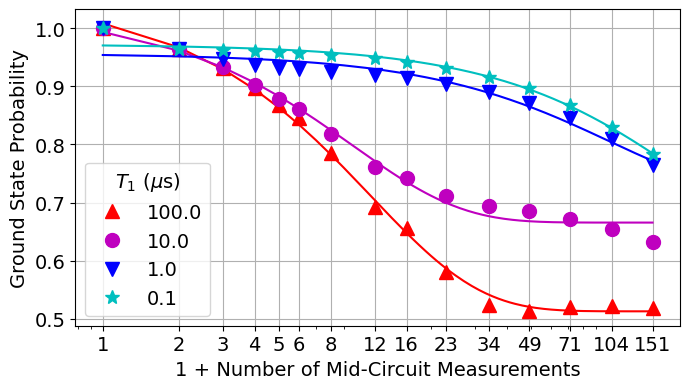

In [16]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
msize = 10
colours = ['r','m','b','c']
markers = ["^","o","v","*","s"]
lstyles = ['-','--','--']
epc_limit = 1e-5

for ind in range(len(T1s)-1):

    xval = xvals_ZZ[ind]
    data = ZZ_data[ind]
    fxval = np.arange(xval[0],xval[-1]+1,1)

    k = 0
    q = 0
    temp_ind = k
    j = 0

    # exponential
    fits = fits_ZZ[ind]
    std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
    alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
    alpha_err = std_errs[1]
    epc = (1-alpha)/2
    epc_err = 1/2*alpha_err

    if epc < epc_limit:
        ax.plot(xval + 1, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[ind],color=colours[ind],label= r'%.1f'%(T1s[ind]))
    else:
        ax.plot(xval + 1, np.mean(data[j,temp_ind,:,:],0),linestyle='',markersize=msize, marker=markers[ind],color=colours[ind],label= r'%.1f'%(T1s[ind]))

    ax.plot(fxval + 1, mcmrb_sims.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[ind])


    fsize2 = fsize
    ax.set_xscale('log')
    ax.legend(loc=0,ncol = 1,fontsize=fsize2,title=r'$T_1~(\mu$s)',title_fontsize=fsize)
    ax.set_ylabel('Ground State Probability',fontsize=fsize2)
    ax.set_xlabel('1 + Number of Mid-Circuit Measurements',fontsize=fsize2)
    ax.set_xticks([  1,   2,   3,   4,   5,   6,   8,  12,  16,  23,  34,  49,  71, 104, 151])
    ax.set_xticklabels([  1,   2,   3,   4,   5,   6,   8,  12,  16,  23,  34,  49,  71, 104, 151],fontsize=fsize2)
    ax.set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
    ax.set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize2)
    ax.grid('minor')

plt.tight_layout();
# plt.savefig('Plots/break_error_vary_T1_onefig.pdf',facecolor=(1, 1, 1),bbox_inches='tight')